In [1]:
!pip install matplotlib deap

  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 13.5 MB/s eta 0:00:00a 0:00:01
Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [matplotlib]9 [matplotlib]


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [3]:

num_locations = 100 
locations = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(num_locations)] 
depot = (500, 500)
num_vehicles = 10



In [4]:


creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin) 

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [5]:

def evalVRP(individual):
    total_distance = 0
    distances = [] 
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP) 
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)  


In [6]:

def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


In [7]:

def main():
    random.seed(42) 
    pop = toolbox.population(n=300)  
    hof = tools.HallOfFame(1) 

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


gen	nevals	avg    	min    
0  	300   	28068.3	388.352
1  	224   	27589.7	322.064
2  	235   	27293.2	392.547
3  	225   	27072.1	352.04 
4  	236   	27042.4	377.708
5  	224   	26812.8	355.495
6  	215   	26643.8	315.161
7  	233   	26612.1	334.374
8  	259   	26651.4	396.82 
9  	222   	26466.2	315.371
10 	230   	26483.8	274.972
11 	235   	26485.2	182.844
12 	243   	26418.1	260.235
13 	235   	26250.1	202.382
14 	215   	26237.5	350.93 
15 	224   	26183.6	319.093
16 	224   	25999.2	319.093
17 	238   	25795.3	319.093
18 	204   	25404.7	319.093
19 	223   	24985.1	322.94 
20 	221   	24747.7	427.229
21 	212   	24466.7	427.229
22 	239   	24318  	435.792
23 	243   	24143.4	439.253
24 	216   	23709  	333.419
25 	245   	23732.4	234.896
26 	222   	23532.5	418.913
27 	237   	23306.9	415.739
28 	212   	23034.5	349.736
29 	236   	22988.7	349.736
30 	234   	22791.6	368.591
31 	227   	22625  	306.881
32 	231   	22626.3	360.372
33 	235   	22525.9	379.132
34 	214   	22309.4	372.773
35 	222   	22124.4	235.452
3

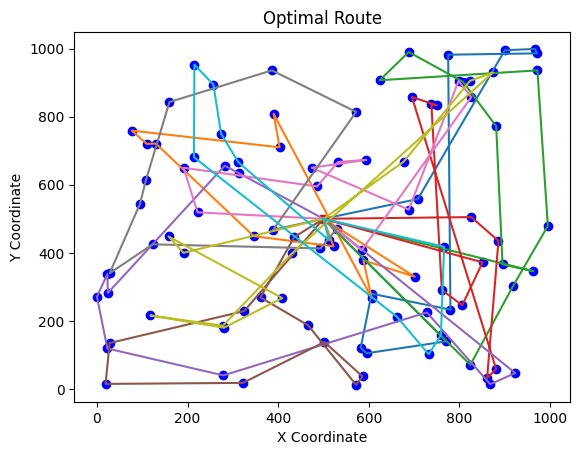

In [8]:

if __name__ == "__main__":
    main()
